In [1]:
# Load data and preprocess

In [2]:
import pandas as pd
import plotly.graph_objects as go

In [9]:
#load data
df = pd.read_csv('AAPL.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101073,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095800,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088768,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090965,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093603,73449600.0
...,...,...,...,...,...,...
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157611700.0
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004,98390600.0
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998,140843800.0


In [15]:
# check for null column values
df.isna().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [16]:
# check for null row values
df[df.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# handle the missing row values by forward filling
df = df.ffill()

In [23]:
# Check for missing values
assert df.isnull().sum().sum() == 0, "Missing values found!"

In [24]:
# Candlestick chart

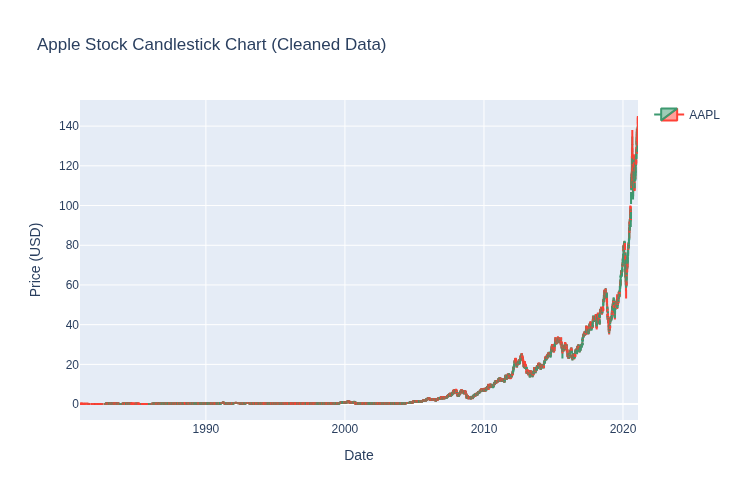

In [35]:
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
    name='AAPL'
   
)])

fig.update_layout(
    title="Apple Stock Candlestick Chart (Cleaned Data)",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False,
    height=500,
    showlegend=True
)

fig.show()


In [36]:
# Aggregate to Last Business Day of Each Month

In [41]:
monthly = df.resample("ME").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last"
})

print("Number of months in dataset:", len(monthly))
print(monthly.head())

Number of months in dataset: 482
                Open      High       Low     Close
Date                                              
1980-12-31  0.128348  0.161272  0.112723  0.152344
1981-01-31  0.154018  0.155134  0.126116  0.126116
1981-02-28  0.119420  0.128906  0.106027  0.118304
1981-03-31  0.118862  0.120536  0.096540  0.109375
1981-04-30  0.108817  0.131138  0.108259  0.126674
